# French Real Estate Data Analysis

## Objective:
#### Now that we have dropped tables with a lot of missing values and taken care of other tables with some missing values, it is time to begin the preprocessing for using Neural Networks.

## Importing Necessary Libraries

In [1]:
#Importing Data processing Libraries
import numpy as np
import pandas as pd


#Importing Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Importing warnings filter to ignore warnings
import warnings
warnings.filterwarnings('ignore')


#Importing Machine Learning and Data Preprocessing Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler


#Importing Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing


from pandas_profiling import ProfileReport


#Set Seaborn Style for Matplotlib
sns.set(style='whitegrid', font_scale=1.5)

TARGET = 'Valeur fonciere'




## Loading our Cleaned Dataset

In [2]:
clean_df = pd.read_csv('Cleaned_DataSet.csv')

In [3]:
clean_df.rename( columns={'Unnamed: 0':'Id'}, inplace=True )
clean_df

,Id,No disposition,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,Day Mutation,Month Mutation,Year Mutation,Surface Total
0,0,1,Vente,37220.0,26.0,RUE,2730,DE MONTHOLON,1000.0,BOURG-EN-BRESSE,...,2.0,Appartement,20.0,1.0,NONE,0.0,4,1,2019,47.27
1,1,1,Vente,185100.0,22.0,RUE,1650,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,...,2.0,Appartement,62.0,3.0,NONE,0.0,4,1,2019,414.51
2,2,1,Vente,185100.0,22.0,RUE,1650,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,...,3.0,Dépendance,0.0,0.0,NONE,0.0,4,1,2019,7.00
3,3,1,Vente,209000.0,3.0,RUE,0043,DES CHAMPAGNES,1160.0,PRIAY,...,1.0,Maison,90.0,4.0,S,940.0,8,1,2019,1030.00
4,4,1,Vente,134900.0,5.0,LOT,A003,LE BIOLAY,1370.0,SAINT-ETIENNE-DU-BOIS,...,1.0,Maison,101.0,5.0,S,490.0,7,1,2019,591.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970052,3970052,1,Vente,520000.0,55.0,RUE,6513,MONTMARTRE,75002.0,PARIS 02,...,2.0,Appartement,47.0,3.0,NONE,0.0,30,6,2020,216.00
3970053,3970053,1,Vente,1740000.0,104.0,RUE,8073,REAUMUR,75002.0,PARIS 02,...,2.0,Appartement,150.0,5.0,NONE,0.0,26,6,2020,264.00
3970054,3970054,1,Vente,725000.0,16.0,RUE,1797,CHARLEMAGNE,75004.0,PARIS 04,...,2.0,Appartement,48.0,3.0,NONE,0.0,25,6,2020,193.80
3970055,3970055,1,Vente,200000.0,7.0,RUE,1669,CHABANAIS,75002.0,PARIS 02,...,2.0,Appartement,26.0,1.0,NONE,0.0,23,6,2020,98.00


## Data Pre-processing

#### We begin pre-processing by analysing the columns or features of our dataset and decide which features are significant for our modelling.

#### We have to be very careful with redundant features (Features that signify the same thing). Redundant features may result in Multicollinearity. 

#### We begin by visualizing the correlation between the independent variables with the dependent variable "Valuer Fonciere".

In [4]:
train_corr = clean_df.corr()

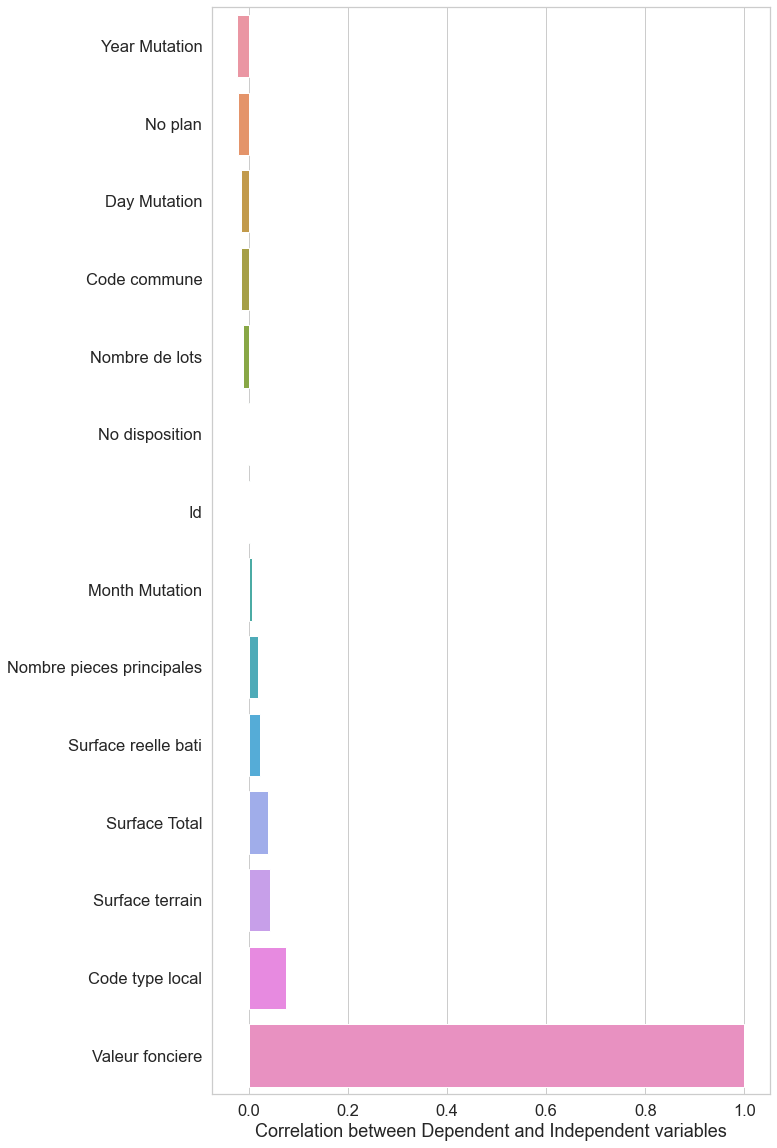

In [5]:
plt.figure(figsize=(10,20))
sns.barplot(y=train_corr['Valeur fonciere'].sort_values().index, x=train_corr['Valeur fonciere'].sort_values().values)
plt.xlabel('Correlation between Dependent and Independent variables')
plt.show()

#### The correlation barplot shows the relationship between Independent and Dependent variables.

In [6]:
profile = ProfileReport(clean_df, progress_bar=False, minimal=True)

In [7]:
#Export a html file of the Descriptive Analysis on the Train-DataSet
profile.to_file('clean-df.html')

In [8]:
profile.to_notebook_iframe()

#### Judging by the Profile Report of the variables and their correlation to the dependent variable, we apply the following operations to the variables:

#### ID- Do nothing, not to be included in the modelling
#### Numero disposition- Do nothing, include in the modelling
#### Nature mutation - One-Hot Encoding, crucial to the modelling
#### Valeur fonciere - Target Variable ,crucial to the modelling
#### Numero Voie - High Cardinality, Remove from the modelling
#### Type de Voie- HIgh Cardinality but include in the modelling
#### Code Voie- High Cardinality, Remove from the modelling
#### Voie - High Cardinality, Remove from the modelling
#### Code Postal-  Convert to numeric, keep in the modelling
#### Commune- High cardinality, include in the modelling
#### Code Department-  so keep from the modelling
#### Code Commune- Keep in the modelling
#### Section- HIgh cardinality, remove from the modelling
#### Numero plan- Keep in the modelling
#### Nombre de lots- Crucial to the modelling
#### Code Type Local- Redundant with Type local (Maison,Appartement,etc.,),Remove from modelling
#### Type Local - Keep in the modelling
#### Surface reelle bati - Crucial,Keep in the modelling
#### Nombre pieces principales- Crucial, Keep in the modelling
#### Nature Culture- Remove from the modelling
#### Surface terrain - Crucial, Keep in the modelling
#### Day Mutation - Crucial, Keep in the modelling
#### Month Mutation - Crucial, Keep in the modelling
#### Year Mutation - Crucial, Keep in the modelling
#### Surface Total - Crucial, Keep in the modelling"

In [9]:
clean_df = clean_df.drop(['No voie'],axis=1)

In [10]:
clean_df = clean_df.drop(['Code voie'],axis=1)

In [11]:
clean_df = clean_df.drop(['Voie'],axis =1)

In [12]:
clean_df['Code postal'] = pd.to_numeric(clean_df['Code postal'],errors='coerce')
clean_df['Code postal']

0           1000.0
1           1000.0
2           1000.0
3           1160.0
4           1370.0
            ...   
3970052    75002.0
3970053    75002.0
3970054    75004.0
3970055    75002.0
3970056    75002.0
Name: Code postal, Length: 3970057, dtype: float64

In [13]:
clean_df['Code postal'].isnull().sum()

42447

In [14]:
clean_df['Code postal'] = clean_df['Code postal'].fillna(0)
clean_df['Code postal'].isnull().sum()

0

In [19]:
clean_df['Code departement'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       21, 22, 23, 24, 25, 26, 27, 28, 29, '29', '2A', '2B', '30', 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 971, 972, 973, 974, 75, '26',
       '27', '28'], dtype=object)

In [15]:
clean_df = clean_df.drop(['Section'],axis=1)

In [16]:
clean_df = clean_df.drop(['Code type local'],axis=1)

In [17]:
clean_df = clean_df.drop(['Nature culture'],axis=1)

In [18]:
clean_df

,Id,No disposition,Nature mutation,Valeur fonciere,Type de voie,Code postal,Commune,Code departement,Code commune,No plan,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Day Mutation,Month Mutation,Year Mutation,Surface Total
0,0,1,Vente,37220.0,RUE,1000.0,BOURG-EN-BRESSE,1,53,298,1,Appartement,20.0,1.0,0.0,4,1,2019,47.27
1,1,1,Vente,185100.0,RUE,1000.0,BOURG-EN-BRESSE,1,53,95,2,Appartement,62.0,3.0,0.0,4,1,2019,414.51
2,2,1,Vente,185100.0,RUE,1000.0,BOURG-EN-BRESSE,1,53,95,1,Dépendance,0.0,0.0,0.0,4,1,2019,7.00
3,3,1,Vente,209000.0,RUE,1160.0,PRIAY,1,314,1676,0,Maison,90.0,4.0,940.0,8,1,2019,1030.00
4,4,1,Vente,134900.0,LOT,1370.0,SAINT-ETIENNE-DU-BOIS,1,350,11,0,Maison,101.0,5.0,490.0,7,1,2019,591.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970052,3970052,1,Vente,520000.0,RUE,75002.0,PARIS 02,75,102,86,2,Appartement,47.0,3.0,0.0,30,6,2020,216.00
3970053,3970053,1,Vente,1740000.0,RUE,75002.0,PARIS 02,75,102,122,2,Appartement,150.0,5.0,0.0,26,6,2020,264.00
3970054,3970054,1,Vente,725000.0,RUE,75004.0,PARIS 04,75,104,67,1,Appartement,48.0,3.0,0.0,25,6,2020,193.80
3970055,3970055,1,Vente,200000.0,RUE,75002.0,PARIS 02,75,102,18,3,Appartement,26.0,1.0,0.0,23,6,2020,98.00


In [14]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3970057 entries, 0 to 3970056
Data columns (total 19 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Id                         int64  
 1   No disposition             int64  
 2   Nature mutation            object 
 3   Valeur fonciere            float64
 4   Type de voie               object 
 5   Code postal                float64
 6   Commune                    object 
 7   Code departement           object 
 8   Code commune               int64  
 9   No plan                    int64  
 10  Nombre de lots             int64  
 11  Type local                 object 
 12  Surface reelle bati        float64
 13  Nombre pieces principales  float64
 14  Surface terrain            float64
 15  Day Mutation               int64  
 16  Month Mutation             int64  
 17  Year Mutation              int64  
 18  Surface Total              float64
dtypes: float64(6), int64(8), object(5)
memory 

In [19]:
clean_df['Commune'].unique()

array(['BOURG-EN-BRESSE', 'PRIAY', 'SAINT-ETIENNE-DU-BOIS', ...,
       'PLESSIS TREVISE', 'REGINA', 'SAINT-ELIE'], dtype=object)

### Label Encoding

#### For regression, the categorical data needs to be encoded so as to represent the categorical data in numerical form. This is done by Label Encoding the Categorical datatypes of the DataFrame.
#### For categorical data with low cardinality (less number of distinct values) we use One-Hot Encoding.
#### For categorical data with high cardinality (high number of distinct values) we use Label Encoding.

In [19]:
from category_encoders import TargetEncoder

In [20]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
commune_labels = gle.fit_transform(clean_df['Commune'])
commune_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
commune_mappings

{0: 'ABAINVILLE',
 1: 'ABANCOURT',
 2: 'ABAUCOURT',
 3: 'ABAUCOURT-HAUTECOURT',
 4: 'ABBANS DESSOUS',
 5: 'ABBANS DESSUS',
 6: 'ABBARETZ',
 7: 'ABBECOURT',
 8: 'ABBENANS',
 9: 'ABBEVILLE',
 10: 'ABBEVILLE ST LUCIEN',
 11: 'ABBEVILLE-LA-RIVIERE',
 12: 'ABBEVILLE-LES-CONFLANS',
 13: 'ABBEVILLERS',
 14: 'ABEILHAN',
 15: 'ABELCOURT',
 16: 'ABERE',
 17: 'ABERGEMENT STE COLOMBE L',
 18: 'ABERGEMENT-DE-CUISERY (L )',
 19: 'ABERGEMENT-DE-VAREY (L )',
 20: 'ABERGEMENT-LA-RONCE',
 21: 'ABERGEMENT-LE-GRAND',
 22: 'ABERGEMENT-LES-THESY',
 23: 'ABIDOS',
 24: 'ABILLY',
 25: 'ABITAIN',
 26: 'ABJAT-SUR-BANDIAT',
 27: 'ABLAIN-ST-NAZAIRE',
 28: 'ABLAINCOURT-PRESSOIR',
 29: 'ABLAINZEVELLE',
 30: 'ABLANCOURT',
 31: 'ABLEIGES',
 32: 'ABLIS',
 33: 'ABLON',
 34: 'ABLON-SUR-SEINE',
 35: 'ABOEN',
 36: 'ABONCOURT',
 37: 'ABONCOURT-GESINCOURT',
 38: 'ABONDANCE',
 39: 'ABONDANT',
 40: 'ABOS',
 41: 'ABREST',
 42: 'ABRIES',
 43: 'ABRIES-RISTOLAS',
 44: 'ABSCON',
 45: 'ABZAC',
 46: 'ACCOLANS',
 47: 'ACCONS',
 48: 'A

In [21]:
clean_df['Commune Label'] = commune_labels
clean_df


,Id,No disposition,Nature mutation,Valeur fonciere,Type de voie,Code postal,Commune,Code departement,Code commune,No plan,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Day Mutation,Month Mutation,Year Mutation,Surface Total,Commune Label
0,0,1,Vente,37220.0,RUE,1000.0,BOURG-EN-BRESSE,1,53,298,1,Appartement,20.0,1.0,0.0,4,1,2019,47.27,3647
1,1,1,Vente,185100.0,RUE,1000.0,BOURG-EN-BRESSE,1,53,95,2,Appartement,62.0,3.0,0.0,4,1,2019,414.51,3647
2,2,1,Vente,185100.0,RUE,1000.0,BOURG-EN-BRESSE,1,53,95,1,Dépendance,0.0,0.0,0.0,4,1,2019,7.00,3647
3,3,1,Vente,209000.0,RUE,1160.0,PRIAY,1,314,1676,0,Maison,90.0,4.0,940.0,8,1,2019,1030.00,21320
4,4,1,Vente,134900.0,LOT,1370.0,SAINT-ETIENNE-DU-BOIS,1,350,11,0,Maison,101.0,5.0,490.0,7,1,2019,591.00,23756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970052,3970052,1,Vente,520000.0,RUE,75002.0,PARIS 02,75,102,86,2,Appartement,47.0,3.0,0.0,30,6,2020,216.00,19998
3970053,3970053,1,Vente,1740000.0,RUE,75002.0,PARIS 02,75,102,122,2,Appartement,150.0,5.0,0.0,26,6,2020,264.00,19998
3970054,3970054,1,Vente,725000.0,RUE,75004.0,PARIS 04,75,104,67,1,Appartement,48.0,3.0,0.0,25,6,2020,193.80,20000
3970055,3970055,1,Vente,200000.0,RUE,75002.0,PARIS 02,75,102,18,3,Appartement,26.0,1.0,0.0,23,6,2020,98.00,19998


In [15]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3970057 entries, 0 to 3970056
Data columns (total 20 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Id                         int64  
 1   No disposition             int64  
 2   Nature mutation            object 
 3   Valeur fonciere            float64
 4   Type de voie               object 
 5   Code postal                float64
 6   Commune                    object 
 7   Code departement           object 
 8   Code commune               int64  
 9   No plan                    int64  
 10  Nombre de lots             int64  
 11  Type local                 object 
 12  Surface reelle bati        float64
 13  Nombre pieces principales  float64
 14  Surface terrain            float64
 15  Day Mutation               int64  
 16  Month Mutation             int64  
 17  Year Mutation              int64  
 18  Surface Total              float64
 19  Commune Label              int32  
dtypes:

In [22]:
encoded_df = clean_df.join(pd.get_dummies(clean_df['Nature mutation']))
encoded_df

,Id,No disposition,Nature mutation,Valeur fonciere,Type de voie,Code postal,Commune,Code departement,Code commune,No plan,...,Month Mutation,Year Mutation,Surface Total,Commune Label,Adjudication,Echange,Expropriation,Vente,Vente en l'état futur d'achèvement,Vente terrain à bâtir
0,0,1,Vente,37220.0,RUE,1000.0,BOURG-EN-BRESSE,1,53,298,...,1,2019,47.27,3647,0,0,0,1,0,0
1,1,1,Vente,185100.0,RUE,1000.0,BOURG-EN-BRESSE,1,53,95,...,1,2019,414.51,3647,0,0,0,1,0,0
2,2,1,Vente,185100.0,RUE,1000.0,BOURG-EN-BRESSE,1,53,95,...,1,2019,7.00,3647,0,0,0,1,0,0
3,3,1,Vente,209000.0,RUE,1160.0,PRIAY,1,314,1676,...,1,2019,1030.00,21320,0,0,0,1,0,0
4,4,1,Vente,134900.0,LOT,1370.0,SAINT-ETIENNE-DU-BOIS,1,350,11,...,1,2019,591.00,23756,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970052,3970052,1,Vente,520000.0,RUE,75002.0,PARIS 02,75,102,86,...,6,2020,216.00,19998,0,0,0,1,0,0
3970053,3970053,1,Vente,1740000.0,RUE,75002.0,PARIS 02,75,102,122,...,6,2020,264.00,19998,0,0,0,1,0,0
3970054,3970054,1,Vente,725000.0,RUE,75004.0,PARIS 04,75,104,67,...,6,2020,193.80,20000,0,0,0,1,0,0
3970055,3970055,1,Vente,200000.0,RUE,75002.0,PARIS 02,75,102,18,...,6,2020,98.00,19998,0,0,0,1,0,0


In [23]:
encoded_df = encoded_df.join(pd.get_dummies(clean_df['Type local']))
encoded_df

,Id,No disposition,Nature mutation,Valeur fonciere,Type de voie,Code postal,Commune,Code departement,Code commune,No plan,...,Echange,Expropriation,Vente,Vente en l'état futur d'achèvement,Vente terrain à bâtir,Appartement,Dépendance,Local industriel. commercial ou assimilé,Maison,NONE
0,0,1,Vente,37220.0,RUE,1000.0,BOURG-EN-BRESSE,1,53,298,...,0,0,1,0,0,1,0,0,0,0
1,1,1,Vente,185100.0,RUE,1000.0,BOURG-EN-BRESSE,1,53,95,...,0,0,1,0,0,1,0,0,0,0
2,2,1,Vente,185100.0,RUE,1000.0,BOURG-EN-BRESSE,1,53,95,...,0,0,1,0,0,0,1,0,0,0
3,3,1,Vente,209000.0,RUE,1160.0,PRIAY,1,314,1676,...,0,0,1,0,0,0,0,0,1,0
4,4,1,Vente,134900.0,LOT,1370.0,SAINT-ETIENNE-DU-BOIS,1,350,11,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970052,3970052,1,Vente,520000.0,RUE,75002.0,PARIS 02,75,102,86,...,0,0,1,0,0,1,0,0,0,0
3970053,3970053,1,Vente,1740000.0,RUE,75002.0,PARIS 02,75,102,122,...,0,0,1,0,0,1,0,0,0,0
3970054,3970054,1,Vente,725000.0,RUE,75004.0,PARIS 04,75,104,67,...,0,0,1,0,0,1,0,0,0,0
3970055,3970055,1,Vente,200000.0,RUE,75002.0,PARIS 02,75,102,18,...,0,0,1,0,0,1,0,0,0,0


In [24]:
voie_labels = gle.fit_transform(encoded_df['Type de voie'])
voie_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
voie_mappings

{0: 'ACH',
 1: 'AGL',
 2: 'ALL',
 3: 'ART',
 4: 'AUT',
 5: 'AV',
 6: 'BD',
 7: 'BER',
 8: 'BORD',
 9: 'BRE',
 10: 'BRG',
 11: 'BRTL',
 12: 'BSN',
 13: 'CAE',
 14: 'CALL',
 15: 'CAMI',
 16: 'CAN',
 17: 'CAR',
 18: 'CASR',
 19: 'CC',
 20: 'CD',
 21: 'CF',
 22: 'CHE',
 23: 'CHEM',
 24: 'CHL',
 25: 'CHS',
 26: 'CHT',
 27: 'CHV',
 28: 'CITE',
 29: 'CLOS',
 30: 'CLR',
 31: 'COR',
 32: 'CORO',
 33: 'COTE',
 34: 'COUR',
 35: 'CPG',
 36: 'CR',
 37: 'CRS',
 38: 'CRX',
 39: 'CTR',
 40: 'CTRE',
 41: 'D',
 42: 'DEVI',
 43: 'DIG',
 44: 'DOM',
 45: 'DRA',
 46: 'DSC',
 47: 'EMBR',
 48: 'ENC',
 49: 'ESC',
 50: 'ESP',
 51: 'ESPA',
 52: 'FG',
 53: 'FOS',
 54: 'FRM',
 55: 'GAL',
 56: 'GARE',
 57: 'GPL',
 58: 'GR',
 59: 'HAB',
 60: 'HAM',
 61: 'HLE',
 62: 'HLG',
 63: 'HLM',
 64: 'ILOT',
 65: 'IMP',
 66: 'JARD',
 67: 'LEVE',
 68: 'LICE',
 69: 'LIGN',
 70: 'LOT',
 71: 'MAIL',
 72: 'MAIS',
 73: 'MAR',
 74: 'MRN',
 75: 'MTE',
 76: 'N',
 77: 'NONE',
 78: 'NTE',
 79: 'PAE',
 80: 'PARC',
 81: 'PAS',
 82: 'PASS',


In [25]:
encoded_df['Voie Label'] = voie_labels
encoded_df


,Id,No disposition,Nature mutation,Valeur fonciere,Type de voie,Code postal,Commune,Code departement,Code commune,No plan,...,Expropriation,Vente,Vente en l'état futur d'achèvement,Vente terrain à bâtir,Appartement,Dépendance,Local industriel. commercial ou assimilé,Maison,NONE,Voie Label
0,0,1,Vente,37220.0,RUE,1000.0,BOURG-EN-BRESSE,1,53,298,...,0,1,0,0,1,0,0,0,0,112
1,1,1,Vente,185100.0,RUE,1000.0,BOURG-EN-BRESSE,1,53,95,...,0,1,0,0,1,0,0,0,0,112
2,2,1,Vente,185100.0,RUE,1000.0,BOURG-EN-BRESSE,1,53,95,...,0,1,0,0,0,1,0,0,0,112
3,3,1,Vente,209000.0,RUE,1160.0,PRIAY,1,314,1676,...,0,1,0,0,0,0,0,1,0,112
4,4,1,Vente,134900.0,LOT,1370.0,SAINT-ETIENNE-DU-BOIS,1,350,11,...,0,1,0,0,0,0,0,1,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970052,3970052,1,Vente,520000.0,RUE,75002.0,PARIS 02,75,102,86,...,0,1,0,0,1,0,0,0,0,112
3970053,3970053,1,Vente,1740000.0,RUE,75002.0,PARIS 02,75,102,122,...,0,1,0,0,1,0,0,0,0,112
3970054,3970054,1,Vente,725000.0,RUE,75004.0,PARIS 04,75,104,67,...,0,1,0,0,1,0,0,0,0,112
3970055,3970055,1,Vente,200000.0,RUE,75002.0,PARIS 02,75,102,18,...,0,1,0,0,1,0,0,0,0,112


In [26]:
encoded_df = encoded_df.join(pd.get_dummies(encoded_df['Code departement']))
encoded_df

,Id,No disposition,Nature mutation,Valeur fonciere,Type de voie,Code postal,Commune,Code departement,Code commune,No plan,...,972,973,974,26,27,28,29,2A,2B,30
0,0,1,Vente,37220.0,RUE,1000.0,BOURG-EN-BRESSE,1,53,298,...,0,0,0,0,0,0,0,0,0,0
1,1,1,Vente,185100.0,RUE,1000.0,BOURG-EN-BRESSE,1,53,95,...,0,0,0,0,0,0,0,0,0,0
2,2,1,Vente,185100.0,RUE,1000.0,BOURG-EN-BRESSE,1,53,95,...,0,0,0,0,0,0,0,0,0,0
3,3,1,Vente,209000.0,RUE,1160.0,PRIAY,1,314,1676,...,0,0,0,0,0,0,0,0,0,0
4,4,1,Vente,134900.0,LOT,1370.0,SAINT-ETIENNE-DU-BOIS,1,350,11,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970052,3970052,1,Vente,520000.0,RUE,75002.0,PARIS 02,75,102,86,...,0,0,0,0,0,0,0,0,0,0
3970053,3970053,1,Vente,1740000.0,RUE,75002.0,PARIS 02,75,102,122,...,0,0,0,0,0,0,0,0,0,0
3970054,3970054,1,Vente,725000.0,RUE,75004.0,PARIS 04,75,104,67,...,0,0,0,0,0,0,0,0,0,0
3970055,3970055,1,Vente,200000.0,RUE,75002.0,PARIS 02,75,102,18,...,0,0,0,0,0,0,0,0,0,0


#### To summarize, we have Encoded our Categorical variables to numerical representation so that it can be used for regression modelling.
#### Two types of Encoders were used:
#### For categorical data with low cardinality (Code departement, Type local, Nature Mutation) we have used One-Hot Encoder.
#### For categorical data with high cardinality(Commune, Voie) we have use Label Encoder.

### Log Transformation of Numerical Data

#### Now that the categorical data is taken care of, it is now time to pre-process Numerical Datatypes.
#### SInce the numerical columns can have large range it is better to take log-functions of their real value.
#### This helps to increase the accuracy of the model.

In [27]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3970057 entries, 0 to 3970056
Columns: 134 entries, Id to 30
dtypes: float64(6), int32(2), int64(8), object(5), uint8(113)
memory usage: 1.0+ GB


In [28]:
LOG_TRANSFORMATION_COLUMNS = [
    'No disposition',
    'Valeur fonciere',
    'Code postal',
    'No plan',
    'Nombre de lots',
    'Code commune',
    'Nombre pieces principales',
    'Surface reelle bati',
    'Surface terrain',
    'Surface Total',
    'Day Mutation',
    'Month Mutation',
    'Year Mutation',
]

In [29]:
for col_ in LOG_TRANSFORMATION_COLUMNS:
    encoded_df[col_] = np.log1p(encoded_df[col_])

In [30]:
encoded_df

,Id,No disposition,Nature mutation,Valeur fonciere,Type de voie,Code postal,Commune,Code departement,Code commune,No plan,...,972,973,974,26,27,28,29,2A,2B,30
0,0,0.693147,Vente,10.524628,RUE,6.908755,BOURG-EN-BRESSE,1,3.988984,5.700444,...,0,0,0,0,0,0,0,0,0,0
1,1,0.693147,Vente,12.128657,RUE,6.908755,BOURG-EN-BRESSE,1,3.988984,4.564348,...,0,0,0,0,0,0,0,0,0,0
2,2,0.693147,Vente,12.128657,RUE,6.908755,BOURG-EN-BRESSE,1,3.988984,4.564348,...,0,0,0,0,0,0,0,0,0,0
3,3,0.693147,Vente,12.250094,RUE,7.057037,PRIAY,1,5.752573,7.424762,...,0,0,0,0,0,0,0,0,0,0
4,4,0.693147,Vente,11.812296,LOT,7.223296,SAINT-ETIENNE-DU-BOIS,1,5.860786,2.484907,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970052,3970052,0.693147,Vente,13.161586,RUE,11.225283,PARIS 02,75,4.634729,4.465908,...,0,0,0,0,0,0,0,0,0,0
3970053,3970053,0.693147,Vente,14.369396,RUE,11.225283,PARIS 02,75,4.634729,4.812184,...,0,0,0,0,0,0,0,0,0,0
3970054,3970054,0.693147,Vente,13.493928,RUE,11.225310,PARIS 04,75,4.653960,4.219508,...,0,0,0,0,0,0,0,0,0,0
3970055,3970055,0.693147,Vente,12.206078,RUE,11.225283,PARIS 02,75,4.634729,2.944439,...,0,0,0,0,0,0,0,0,0,0


## Training and Testing Sets

#### Now it is time to seperate our Data into Train, Validation and Test Sets.

In [31]:
FEATURES = encoded_df.columns.drop(['Id', TARGET])
# Discard non-numerical features
FEATURES = list(filter(lambda x: encoded_df[x].dtype != 'object', FEATURES))
FEATURES

['No disposition',
 'Code postal',
 'Code commune',
 'No plan',
 'Nombre de lots',
 'Surface reelle bati',
 'Nombre pieces principales',
 'Surface terrain',
 'Day Mutation',
 'Month Mutation',
 'Year Mutation',
 'Surface Total',
 'Commune Label',
 'Adjudication',
 'Echange',
 'Expropriation',
 'Vente',
 "Vente en l'état futur d'achèvement",
 'Vente terrain à bâtir',
 'Appartement',
 'Dépendance',
 'Local industriel. commercial ou assimilé',
 'Maison',
 'NONE',
 'Voie Label',
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 971,
 972,
 973,
 974,
 '26',
 '27',
 '28',
 '29',
 '2A',
 '2B',
 '30']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(encoded_df[FEATURES], encoded_df[TARGET], test_size=0.2, random_state=1)
    
    



In [33]:
X_train.shape

(3176045, 127)

In [34]:
X_test.shape

(794012, 127)

In [35]:
y_train.shape

(3176045,)

In [36]:
y_test.shape

(794012,)

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1) # 0.25 x 0.8 = 0.2

In [38]:
X_train.shape

(2540836, 127)

In [39]:
X_val.shape

(635209, 127)

#### We have divided our dataset into three different subsets:
#### TrainSet is used to Train our Deep Neural Network and makes up 64% of our data.
#### ValidationSet is used to validate and update the loss function during the trainning of our  DNN.
#### TestSet is used to Test our Model after the completion of our Model Training.

### Normalization

#### Normalization refers to the process of adjusting measured values on different scales to a notionally common scale.
#### We use MinMaxScaler() to normalize our dataset.

In [40]:
scaler = MinMaxScaler()

In [41]:
X_train = scaler.fit_transform(X_train)

X_val = scaler.fit_transform(X_val)

X_test = scaler.fit_transform(X_test)

## Trainning our DNN Model

In [42]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(
    loss='mse',
    optimizer='Adam',
    metrics=['mse']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               16384     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 20,545
Trainable params: 20,545
Non-trainable params: 0
_________________________________________________________________


In [43]:
%%time

EPOCHS = 100

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_mse', patience=25)

history = model.fit(
    X_train,
    y_train,
    batch_size=256,
    verbose=2,
    epochs=EPOCHS,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)

Train on 2540836 samples, validate on 635209 samples
Epoch 1/100
2540836/2540836 - 48s - loss: 4.3929 - mse: 4.3929 - val_loss: 3.9326 - val_mse: 3.9326
Epoch 2/100
2540836/2540836 - 40s - loss: 3.8634 - mse: 3.8634 - val_loss: 3.7792 - val_mse: 3.7791
Epoch 3/100
2540836/2540836 - 43s - loss: 3.7435 - mse: 3.7435 - val_loss: 3.6882 - val_mse: 3.6882
Epoch 4/100
2540836/2540836 - 41s - loss: 3.6763 - mse: 3.6763 - val_loss: 3.6420 - val_mse: 3.6420
Epoch 5/100
2540836/2540836 - 41s - loss: 3.6283 - mse: 3.6283 - val_loss: 3.5979 - val_mse: 3.5979
Epoch 6/100
2540836/2540836 - 41s - loss: 3.5896 - mse: 3.5896 - val_loss: 3.5651 - val_mse: 3.5651
Epoch 7/100
2540836/2540836 - 41s - loss: 3.5570 - mse: 3.5570 - val_loss: 3.5416 - val_mse: 3.5416
Epoch 8/100
2540836/2540836 - 42s - loss: 3.5260 - mse: 3.5260 - val_loss: 3.5064 - val_mse: 3.5064
Epoch 9/100
2540836/2540836 - 40s - loss: 3.5019 - mse: 3.5019 - val_loss: 3.4990 - val_mse: 3.4990
Epoch 10/100
2540836/2540836 - 41s - loss: 3.47

Epoch 82/100
2540836/2540836 - 41s - loss: 3.0868 - mse: 3.0868 - val_loss: 3.1782 - val_mse: 3.1782
Epoch 83/100
2540836/2540836 - 41s - loss: 3.0855 - mse: 3.0855 - val_loss: 3.1679 - val_mse: 3.1679
Epoch 84/100
2540836/2540836 - 41s - loss: 3.0841 - mse: 3.0841 - val_loss: 3.1756 - val_mse: 3.1756
Epoch 85/100
2540836/2540836 - 41s - loss: 3.0804 - mse: 3.0804 - val_loss: 3.1757 - val_mse: 3.1757
Epoch 86/100
2540836/2540836 - 41s - loss: 3.0800 - mse: 3.0800 - val_loss: 3.1605 - val_mse: 3.1605
Epoch 87/100
2540836/2540836 - 41s - loss: 3.0773 - mse: 3.0773 - val_loss: 3.1674 - val_mse: 3.1674
Epoch 88/100
2540836/2540836 - 41s - loss: 3.0766 - mse: 3.0766 - val_loss: 3.1687 - val_mse: 3.1687
Epoch 89/100
2540836/2540836 - 41s - loss: 3.0747 - mse: 3.0747 - val_loss: 3.1535 - val_mse: 3.1535
Epoch 90/100
2540836/2540836 - 41s - loss: 3.0719 - mse: 3.0719 - val_loss: 3.1573 - val_mse: 3.1573
Epoch 91/100
2540836/2540836 - 41s - loss: 3.0703 - mse: 3.0703 - val_loss: 3.1637 - val_ms

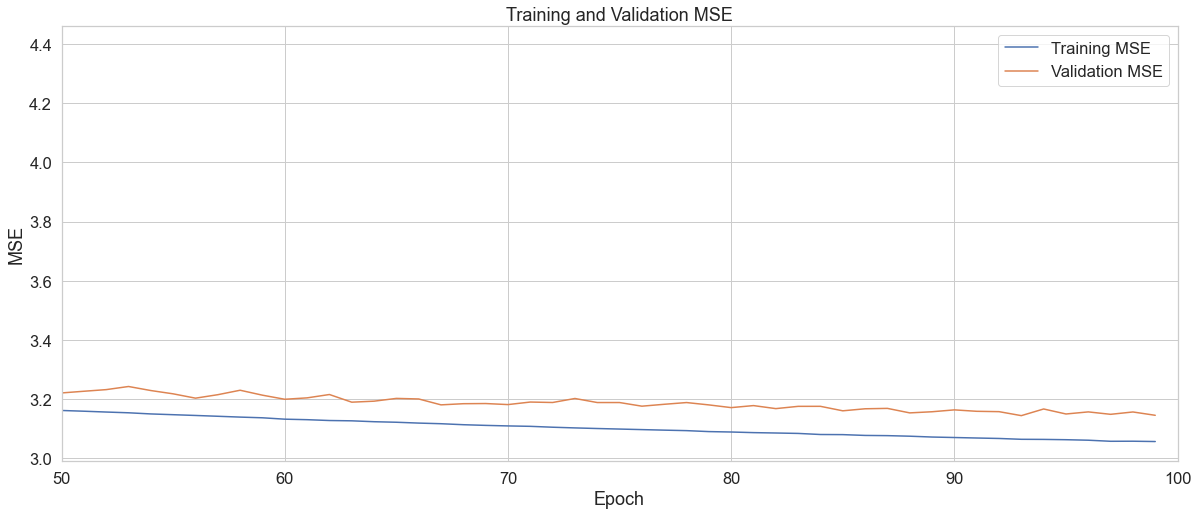

<Figure size 432x288 with 0 Axes>

In [59]:
TRACE_START = 50
mse = history.history['mse']
val_mse = history.history['val_mse']

epochs_range = range(len(mse))

plt.figure(figsize=(20, 8))
plt.plot(epochs_range, mse, label='Training MSE')
plt.plot(epochs_range, val_mse, label='Validation MSE')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.xlim(TRACE_START, len(mse))


plt.show()
plt.savefig('TvV_MSE.png',bbox_inches='tight')


In [46]:
model.evaluate(X_val, y_val, verbose=0)

[3.1453459374785657, 3.145344]

#### Our Model gave a MSE score of 3.145 on Validation set, which is not great.
#### The possible reasons for this could be:
#### 1. Messy Data - The dataset was highly complex and contained a lot of missing values.
#### 2. High Bias- The dataset contained many variables which increased the bias of the model
#### 3. Limited Knowledge of French Real Estate - Due to my limited knowledge of French Real Estate, there is a high chance that I may have overlooked relationships that were crucial to modelling.

In [49]:
predictions = np.exp(model.predict(X_test)) - 1
predictions

array([[  7749.8057],
       [147815.31  ],
       [ 49249.188 ],
       ...,
       [655757.6   ],
       [466061.66  ],
       [ 87859.1   ]], dtype=float32)

In [67]:
Actual = np.exp(y_test)-1
Actual

1882702      70000.0
2700880     140900.0
2284489      19000.0
630354      145000.0
3607479     159900.0
             ...    
412989      149540.0
1433166     124500.0
3114165    2209000.0
377091      364000.0
2812221      71100.0
Name: Valeur fonciere, Length: 794012, dtype: float64

#### Now that we have made our predictions using the model, it is time to store them in a DataFrame so that we can compare them side by side

In [68]:
submission_df = pd.DataFrame(np.exp(y_test)-1)

In [69]:
submission_df

,Valeur fonciere
1882702,70000.0
2700880,140900.0
2284489,19000.0
630354,145000.0
3607479,159900.0
...,...
412989,149540.0
1433166,124500.0
3114165,2209000.0
377091,364000.0


In [70]:
submission_df= submission_df.set_axis(['Actual Value'], axis=1, inplace=False)

In [71]:
submission_df

,Actual Value
1882702,70000.0
2700880,140900.0
2284489,19000.0
630354,145000.0
3607479,159900.0
...,...
412989,149540.0
1433166,124500.0
3114165,2209000.0
377091,364000.0


In [72]:
submission_df['Predicted Value']=predictions

In [73]:
submission_df

,Actual Value,Predicted Value
1882702,70000.0,7749.805664
2700880,140900.0,147815.312500
2284489,19000.0,49249.187500
630354,145000.0,161422.546875
3607479,159900.0,91673.945312
...,...,...
412989,149540.0,96678.296875
1433166,124500.0,258188.890625
3114165,2209000.0,655757.625000
377091,364000.0,466061.656250


#### It is evident that the predictions are wayward. 
#### It means that the model need to be optmized to get better predictions.

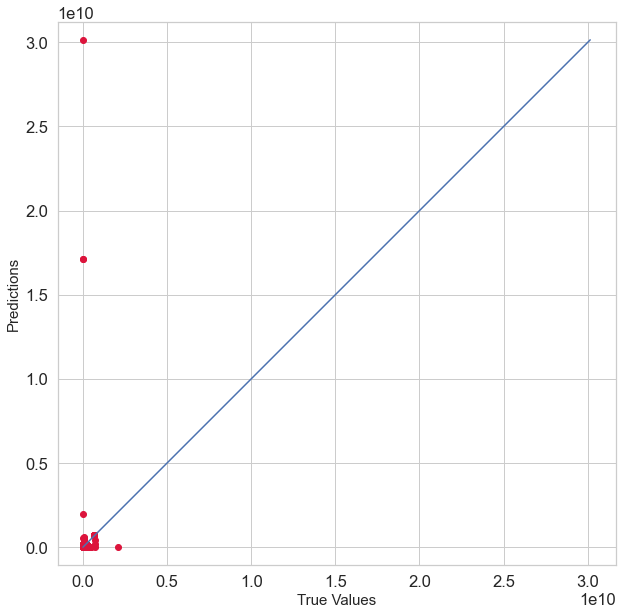

<Figure size 432x288 with 0 Axes>

In [75]:
plt.figure(figsize=(10,10))
plt.scatter(Actual, predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictions), max(Actual))
p2 = min(min(predictions), min(Actual))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

plt.savefig('PvA.png')

#### Finally we export the Submission_df DataFrame to csv for as the prediction submission for the model.

In [76]:
submission_df.to_csv('Submission.csv')

#### Some of the measures to increase the model accuracy could be:
#### 1. More extensive Data Cleaning.
#### 2. Improve Bias-Variance tradeoff.
#### 3. Take a deeper look into the French Real Estate Systems.
#### 4. Tune hyperparameters like learning rate, optmization functions etc.,